# 1. Normal Distribution

- Different displays of normally distributed data
- Compare different samples from a normal distribution
- Check for normality
- Work with the cumulative distribution function (CDF)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Note: seaborn is a package for the visualization of statistical data

In [3]:
import seaborn as sns
sns.set(style='ticks')

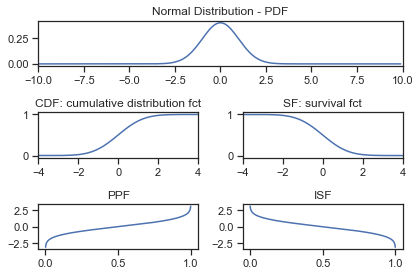

In [4]:
''' Different aspects of a normal distribution'''
# Generate the data
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate

x2 = np.r_[0:1:0.001]

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.tight_layout()
plt.show()

### 1-1 Random numbers with a normal distribution

Text(0.5, 1.0, 'Shifted Normal Distribution')

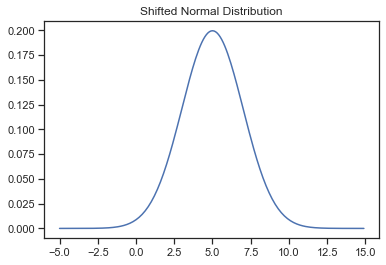

In [5]:
'''PDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')

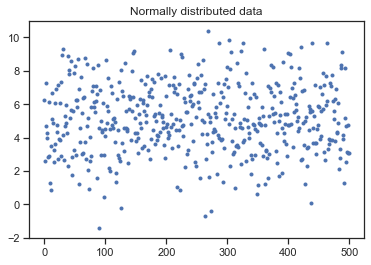

Text(0.5, 1.0, 'Histogram of normally distributed data')

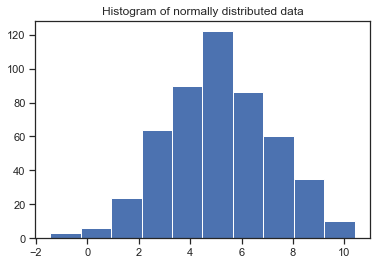

In [6]:
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')

### 1-2 Multiple normal sample distributions

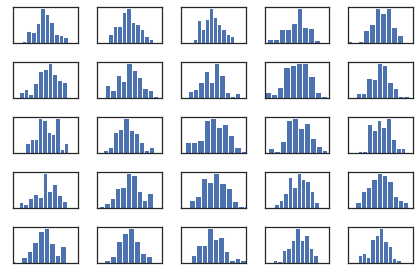

The standard error of the mean, with 100 samples, is 0.203


In [7]:
'''
Show multiple samples from the same distribution, and compare means.
Do this 25 times, and show the histograms
'''
numRows = 5
numData = 100
for ii in range(numRows):
    for jj in range(numRows):
        data = stats.norm.rvs(myMean, mySD, size=numData)
        plt.subplot(numRows,numRows,numRows*ii+jj+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()
plt.show()

# Check out the mean of 1000 normally distributded samples
numTrials = 1000;
numData = 100
myMeans = np.ones(numTrials)*np.nan
for ii in range(numTrials):
    data = stats.norm.rvs(myMean, mySD, size=numData)
    myMeans[ii] = np.mean(data)
    
print('The standard error of the mean, with {0} samples, is {1:5.3f}'.format(numData, np.std(myMeans, ddof=1)))

### 1-3 Normality Check

A. Show a distribution

(array([ 9.,  8., 14., 14., 11., 13.,  9., 11.,  7.,  4.]),
 array([1.35393618, 2.13366542, 2.91339466, 3.6931239 , 4.47285314,
        5.25258239, 6.03231163, 6.81204087, 7.59177011, 8.37149935,
        9.1512286 ]),
 <a list of 10 Patch objects>)

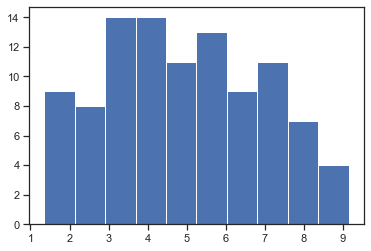

In [8]:
numData = 100
myMean = 5
mySD = 2
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)

B. Graphical test: if the data lie on a line, they are pretty much(QQ plot)

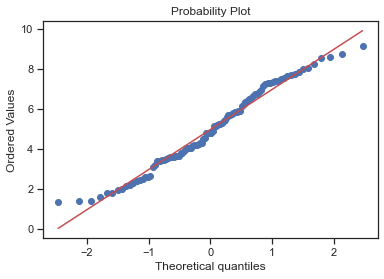

In [15]:
_ = stats.probplot(data, plot=plt)

C. "normaltest" is based on D’Agostino and Pearson’s test 

In [12]:
#  The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
# _,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

In [16]:
_, pVal = stats.normaltest(data)
print("P-Val=", pVal)
if pVal > 0.05:
    print('Data are probably normally distributed')

P-Val= 0.005014842685194488


### 1-4 Values from the Cumulative Distribution Function

Calculate an empirical cumulative distribution function, compare it with the exact one, and find the exact point for a specific data value.

With a threshold of 2.00, you get 7% of the data
To get 97.5% of the data, you need a threshold of 8.92.


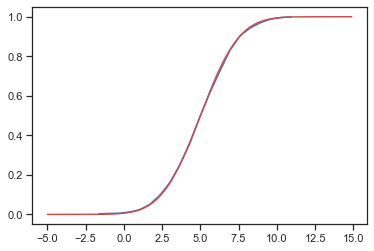

In [17]:
# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 1000
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges = np.histogram(data, bins=numbins, density=True)
cdf = np.cumsum(counts)
cdf /= max(cdf)

# compare with the exact CDF
plt.plot(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))

# 2 Discrete Distribution Functions

- Binomial distribution
- Poisson distribution (PMF, CDF, and PPF)

### 2-1 Binomial Distribution

In [21]:
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'P(X)')

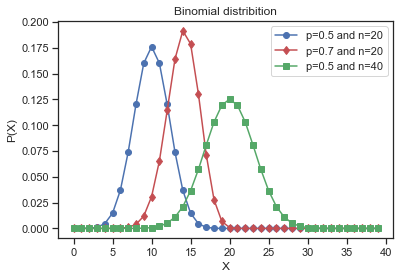

In [22]:
bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.7)
bd3 = stats.binom(40, 0.5)
k = np.arange(40)
plot(k, bd1.pmf(k), 'o-b')
plot(k, bd2.pmf(k), 'd-r')
plot(k, bd3.pmf(k), 's-g')
title('Binomial distribition')
legend(['p=0.5 and n=20', 'p=0.7 and n=20', 'p=0.5 and n=40'])
xlabel('X')
ylabel('P(X)')

### 2-2 Poisson Distribution 

Text(0, 0.5, 'P(X)')

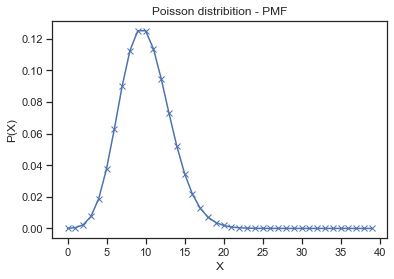

In [23]:
pd = stats.poisson(10)
plot(k, pd.pmf(k),'x-')
title('Poisson distribition - PMF')
xlabel('X')
ylabel('P(X)')

CDF

Text(0, 0.5, 'P(X)')

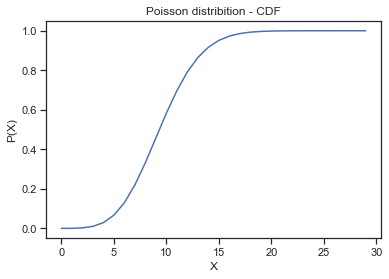

In [24]:
k = arange(30)
plot(k, pd.cdf(k))
title('Poisson distribition - CDF')
xlabel('X')
ylabel('P(X)')

PPF: Percentile point function

# 3. Continuous Distribution Functions

- Exponential distribution
- T-distribution
- F-distribution
- Logistic distribution
- Lognormal distribution
- Uniform distribution

Text(0, 0.5, 'P(X)')

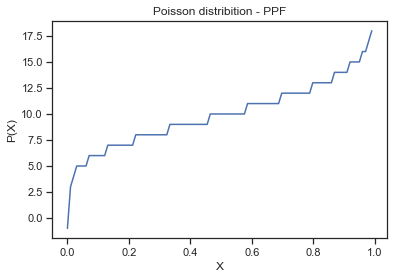

In [25]:
y = linspace(0,1,100)
plot(y, pd.ppf(y))
title('Poisson distribition - PPF')
xlabel('X')
ylabel('P(X)')

In [26]:
%pylab inline
from scipy import stats
matplotlib.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


In [27]:
x = linspace(-10,10,201)
def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
    '''Utility function to show the distributions, and add labels and title.'''
    plot(x, d1.pdf(x))
    if d2 != '':
        plot(x, d2.pdf(x), 'r')
        legend(legendTxt)
    xlim(xmin, xmax)
    title(tTxt)
    xlabel(xTxt)
    ylabel(yTxt)
    show() 

Normal distribution

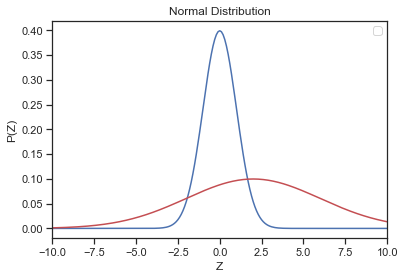

In [30]:
showDistribution(stats.norm, stats.norm(loc=2, scale=4),
                 'Normal Distribution', 'Z', 'P(Z)','')

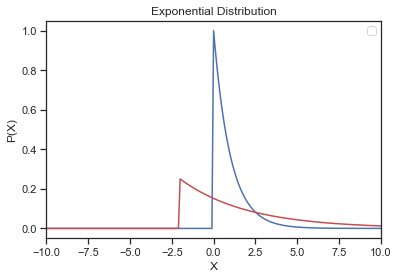

In [31]:
# Exponential distribution
showDistribution(stats.expon, stats.expon(loc=-2, scale=4),
                 'Exponential Distribution', 'X', 'P(X)','')

In [32]:
Students' T-distribution

SyntaxError: EOL while scanning string literal (<ipython-input-32-a6cb78f0ca40>, line 1)

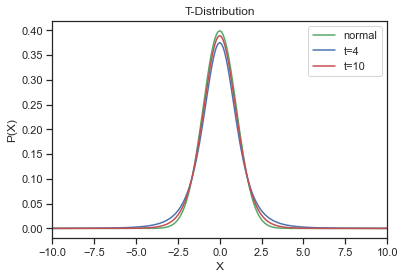

In [33]:
# ... with 4, and with 10 degrees of freedom (DOF)
plot(x, stats.norm.pdf(x), 'g')
showDistribution(stats.t(4), stats.t(10),
                 'T-Distribution', 'X', 'P(X)',['normal', 't=4', 't=10'])

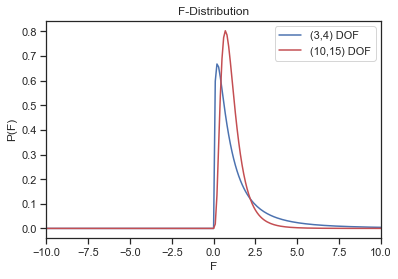

In [34]:
# F-distribution
# ... with (3,4) and (10,15) DOF
showDistribution(stats.f(3,4), stats.f(10,15),
                 'F-Distribution', 'F', 'P(F)',['(3,4) DOF', '(10,15) DOF'])

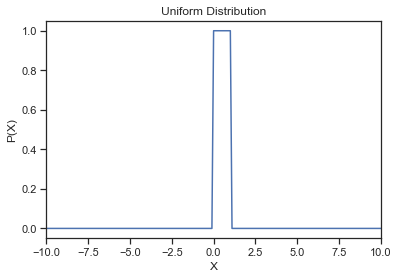

In [35]:
#Uniform distribution
showDistribution(stats.uniform,'' ,
                 'Uniform Distribution', 'X', 'P(X)','')

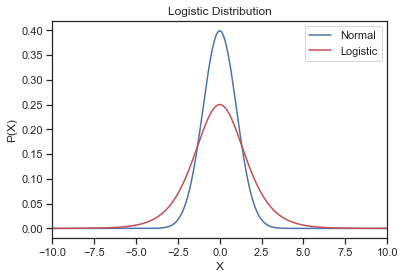

In [36]:
# Logistic distribution
showDistribution(stats.norm, stats.logistic,
                 'Logistic Distribution', 'X', 'P(X)',['Normal', 'Logistic'])

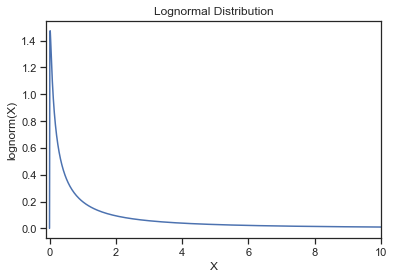

In [37]:
#Lognormal distribution
x = logspace(-9,1,1001)+1e-9
showDistribution(stats.lognorm(2), '',
                 'Lognormal Distribution', 'X', 'lognorm(X)','', xmin=-0.1)

Text(0, 0.5, 'lognorm(X)')

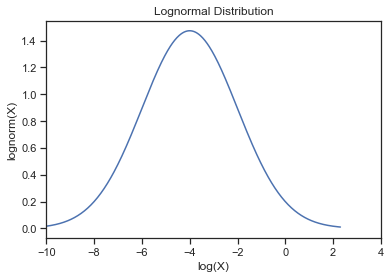

In [38]:
# The log-lin plot has to be done by hand:
plot(log(x), stats.lognorm.pdf(x,2))
xlim(-10, 4)
title('Lognormal Distribution')
xlabel('log(X)')
ylabel('lognorm(X)')